In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
path = 'C:\\Users\\Tushar\\Documents\\US_Accidents_Dec21_updated.csv'
data = pd.read_csv(path)
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


# Basic Analysis 
1. Info about the dataset and its columns.
2. Shape of the dataset.
3. Impute missing values.
4. Extract the necessary columns for performing Exploratory Data Analysis.
5. Statistical inference of the data.


In [3]:
data.shape

(2845342, 47)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [5]:
data.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [6]:
columns_to_drop = ['Number','ID','Description','Zipcode','Airport_Code','Weather_Timestamp','Wind_Chill(F)','Wind_Direction','Amenity','Give_Way','No_Exit','Station',
                   'Traffic_Calming','Turning_Loop','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight','County']
data.drop(columns_to_drop,axis=1,inplace=True)

In [7]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.776068e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,6.179356e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.862263e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,5.000000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,6.400000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [8]:
data.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Street', 'Side', 'City', 'State',
       'Country', 'Timezone', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Bump', 'Crossing', 'Junction', 'Railway',
       'Roundabout', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset'],
      dtype='object')

In [9]:
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])

In [10]:
data['Time_Elapsed'] = data.End_Time - data.Start_Time

In [11]:
data.Time_Elapsed.head()

0   0 days 06:00:00
1   0 days 06:00:00
2   0 days 06:00:00
3   0 days 06:00:00
4   0 days 06:00:00
Name: Time_Elapsed, dtype: timedelta64[ns]

## HANDLING MISSING VALUES
1. Temperature
2. Humidity
3. Pressure
4. Visibility
5. Wind Speed
6. Precipitation
7. Weather_condition

In [12]:
data[['Start_Time','Temperature(F)']].head(15)

,Start_Time,Temperature(F)
0,2016-02-08 00:37:08,42.1
1,2016-02-08 05:56:20,36.9
2,2016-02-08 06:15:39,36.0
3,2016-02-08 06:51:45,39.0
4,2016-02-08 07:53:43,37.0
5,2016-02-08 08:16:57,35.6
6,2016-02-08 08:15:41,33.8
7,2016-02-08 11:51:46,33.1
8,2016-02-08 14:19:57,39.0
9,2016-02-08 15:16:43,32.0


In [13]:
columns = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition']
dummy_df = data[columns]
dummy_df.head()

,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition
0,42.1,58.0,29.76,10.0,10.4,0.00,Light Rain
1,36.9,91.0,29.68,10.0,NaN,0.02,Light Rain
2,36.0,97.0,29.70,10.0,NaN,0.02,Overcast
3,39.0,55.0,29.65,10.0,NaN,NaN,Overcast
4,37.0,93.0,29.69,10.0,10.4,0.01,Light Rain


In [14]:
dummy_df['Temperature(F)'].mean()

61.79355592154077

<AxesSubplot:>

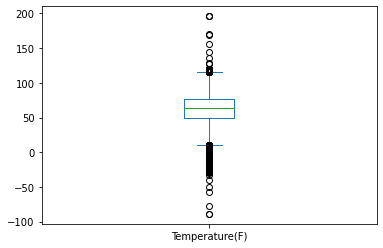

In [15]:
dummy_df['Temperature(F)'].plot(kind='box')

Temperature column has many outliers as shown in the boxplot. Hence filling the values with mean will affect the dataset very much. So we use the forward and backward fill method to fill up the values as according to the timestamp all the days recorded are sorted in increasing manner.

In [16]:
dummy_df['Temperature(F)'].ffill(inplace=True)

C:\Users\Tushar\AppData\Local\Temp\ipykernel_18800\4293750658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy_df['Temperature(F)'].ffill(inplace=True)


<AxesSubplot:>

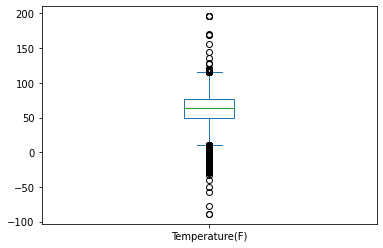

In [17]:
dummy_df['Temperature(F)'].plot(kind='box')

<AxesSubplot:>

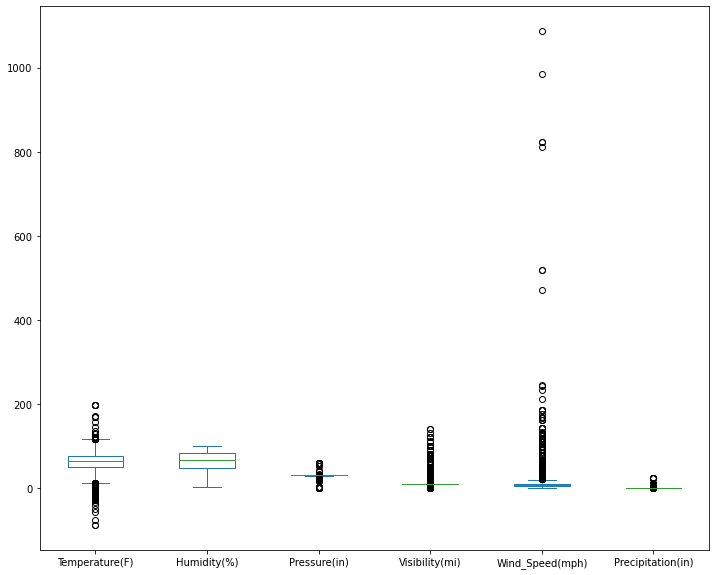

In [18]:
dummy_df.plot(kind='box',figsize=(12,10))

Based on the number of outliers and missing values in these columns we will opt for
1. Mean for humidity column with no outliers.
2. Forward fill for pressure and visibiltiy.
3. Forward filling or backward filling or interpolation for wind speed.
4. May drop the precipitation column since the count of null is too high.

In [19]:
data[['Temperature(F)', 'Humidity(%)', 'Pressure(in)','Visibility(mi)']].ffill(inplace=True)

C:\Users\Tushar\AppData\Local\Temp\ipykernel_18800\3603817166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Temperature(F)', 'Humidity(%)', 'Pressure(in)','Visibility(mi)']].ffill(inplace=True)


In [20]:
data['Wind_Speed(mph)'].interpolate(inplace=True)

In [21]:
data['Precipitation(in)'].isnull().sum() / data.shape[0]

0.19310789353265795

In [22]:
data['Precipitation(in)'].ffill(inplace=True)

In [23]:
data.Weather_Condition.isnull().sum()

70636

In [24]:
data.Weather_Condition.fillna(data.Weather_Condition.mode(),inplace=True)

In [25]:
data.Sunrise_Sunset.dropna(inplace = True)

In [26]:
data.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Street', 'Side', 'City', 'State',
       'Country', 'Timezone', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)',
       'Weather_Condition', 'Bump', 'Crossing', 'Junction', 'Railway',
       'Roundabout', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset',
       'Time_Elapsed'],
      dtype='object')

## Questions to be answered

1. Determining the most common type of severity level of the accidents.
2. How much road was affected by the accident.
3. Are there any specific areas where accidents are highest.
4. What time of the day most accidents occur i.e day or night 
5. Separate the no of accidents in different intervals of the time of the day.
6. Is accident related to the weather condition .
7. Is it related to the temperature or wind speed,precipitation and visibility.
8. Are there more speed bumps where accidents occur more frequently.
9. Are there junctions or stops or railway station or traffic signal nearby.
10. Geospatial analysis.

First let us check the correlation of different columns. 

<AxesSubplot:>

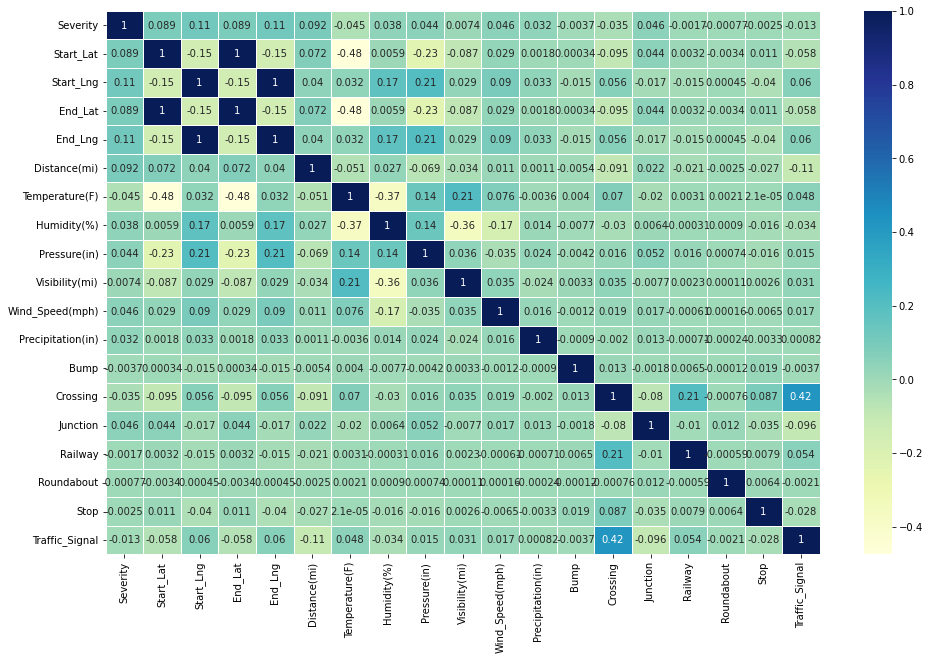

In [59]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True,linewidth=.5,cmap='YlGnBu')

From the heatmap we dont get much of a information that how severity or other factors depend on each other. All the columns show nearly to zero correlation except the basic relations like railways, traffic signal, crossing etc.

<AxesSubplot:xlabel='Severity level', ylabel='Count (in million)'>

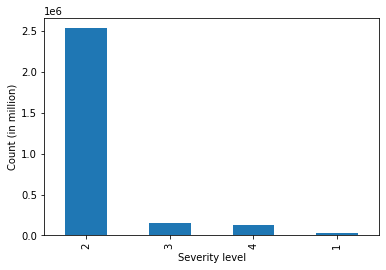

In [28]:
data.Severity.value_counts().plot(kind='bar',xlabel='Severity level',ylabel='Count (in million)')

Major part of the total accidents were of severity level 2 (2.5 million) which means most accidents caused  a possible injury  and a little close to significant impact on the traffic and caused intermediate to short term delays.

In [29]:
data['Distance(mi)'].describe()

count    2.845342e+06
mean     7.026779e-01
std      1.560361e+00
min      0.000000e+00
25%      5.200000e-02
50%      2.440000e-01
75%      7.640000e-01
max      1.551860e+02
Name: Distance(mi), dtype: float64

In [30]:
data[data['Distance(mi)'] > 155]

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,...,Weather_Condition,Bump,Crossing,Junction,Railway,Roundabout,Stop,Traffic_Signal,Sunrise_Sunset,Time_Elapsed
2283651,2,2020-04-29 15:57:22,2020-04-29 16:26:56,48.14995,-116.6002,45.92681,-116.13068,155.186,Highway 95,R,...,Mostly Cloudy,False,False,False,False,False,False,False,Day,0 days 00:29:34


<AxesSubplot:xlabel='Distance(mi)', ylabel='Frequency'>

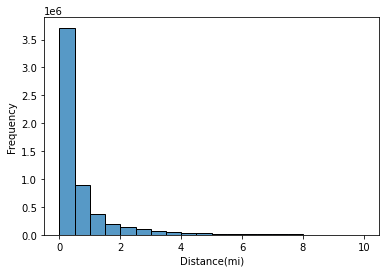

In [31]:
sns.histplot(data['Distance(mi)'],stat='frequency',binrange=(0,10),bins = 20)

In [32]:
np.percentile(data['Distance(mi)'], [97.5 ,2.5])

array([4.18, 0.  ])

According to the distribution not much of the road was affected due to accidents. Mostly the road length impacted was about 0-4 miles (0-6 km) which accounts for 95% of the data but still large number of accidents caused not very close to a significant
impact on road and decrease exponentially.

In [33]:
data.groupby('Sunrise_Sunset')['Severity'].value_counts()

Sunrise_Sunset  Severity
Day             2           1606495
                3            107057
                4             76687
                1             21696
Night           2            924124
                4             54018
                3             48044
                1              4354
Name: Severity, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Severity'>

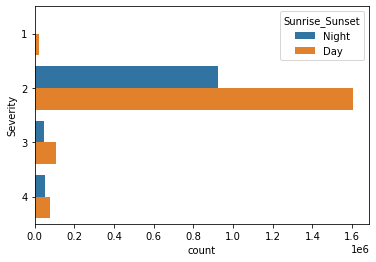

In [34]:
sns.countplot(y='Severity',data=data,hue='Sunrise_Sunset')

Most accidents occured during the day time, comparatively higher than night time and in all the severity levels daytime counts are higher. 

Text(0.5, 0, 'Weekdays')

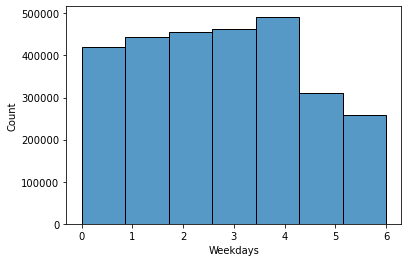

In [35]:
sns.histplot(data.Start_Time.dt.dayofweek,bins=7)
plt.xlabel('Weekdays')

Most number of accidents occur in the third and fourth day of the week and the number of accidents increase gradually till the 4th day and then drop by a huge number.

<AxesSubplot:>

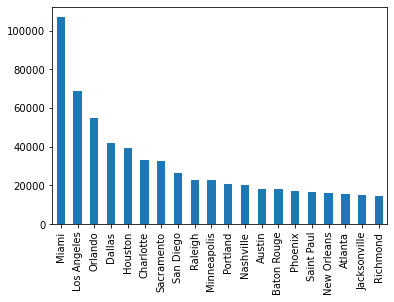

In [36]:
data.City.value_counts()[:20].plot(kind='bar')

These are the top 5 cities with highest number of accidents :
1. Miami
2. Los Angeles
3. Orlando
4. Dallas
5. Houston

Miami is the only city with over a million accidents from 2016-2021 and the decreasing curve is a significant downward curve.

<AxesSubplot:>

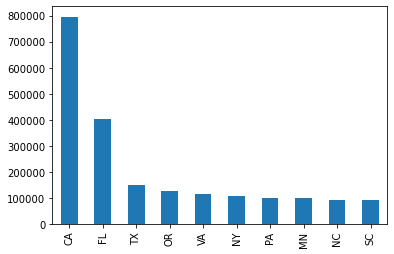

In [37]:
data.State.value_counts()[:10].plot(kind='bar')

California has the most number of accidents followed by Florida and then Texas.

C:\Users\Tushar\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Timezone', ylabel='count'>

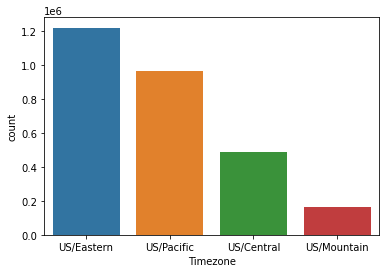

In [38]:
sns.countplot(data['Timezone'])

Eastern region areas have more frequent occurence of accidents (2016-2021) than other regions and Mountain regions being the lowest at 2 lakhs. 

<AxesSubplot:>

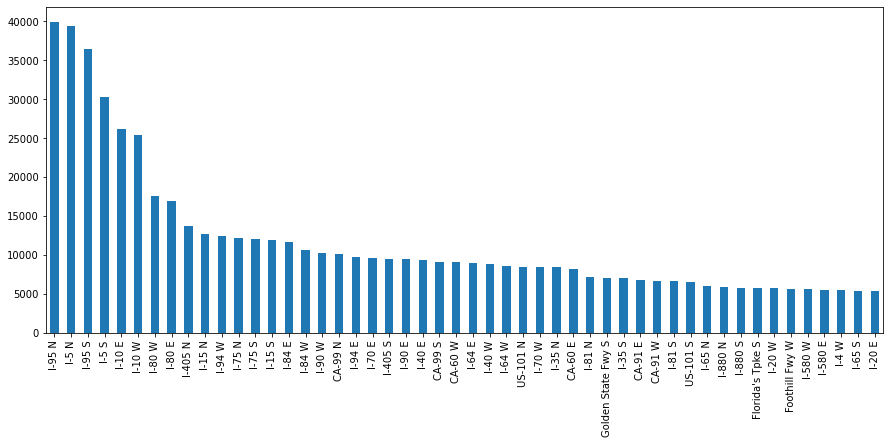

In [46]:
plt.figure(figsize=(15,6))
data['Street'].value_counts()[:50].plot(kind='bar')

I-95 N is the most accident prone street ,
I-5 N is the second most accident prone ,
And the trend is decreasing exponentially

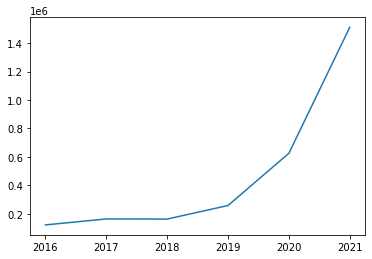

In [52]:
plt.plot(data.Start_Time.dt.year.value_counts().sort_index())

Year wise the number of accidents were lowest at 2016 ,then throughout 2017 and 2018 it had a contant slope but greater than 2016 and then the number of accidents kept increasing year by year.

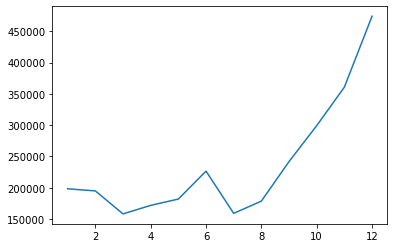

In [57]:
plt.plot(data.Start_Time.dt.month.value_counts().sort_index())

Month wise the highest occurence of accidents were in the months of october-december which is more than double the accidents in the start of the year.

One reason can be since its winter season so due to formation of ice layer on the road most cars would lose traction resulting in accident and since these time of the months its the festive season the crowdiness would also be too large which may be a valid arguement for a large numbe rof accidents.